In [308]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as LabEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import pickle
from sklearn import tree as tr

In [309]:
df=pd.read_csv("/home/sarra/Documents/projetGLSI1/prediction/dataBC.csv")


In [310]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [311]:
#endoce the M or B values in diagnosis(pos in df==1) column to 1 or 0
labEncoder_y=e=LabEncoder()
df.iloc[:,1]=labEncoder_y.fit_transform(df.iloc[:,1])

In [313]:
df.shape

(569, 32)

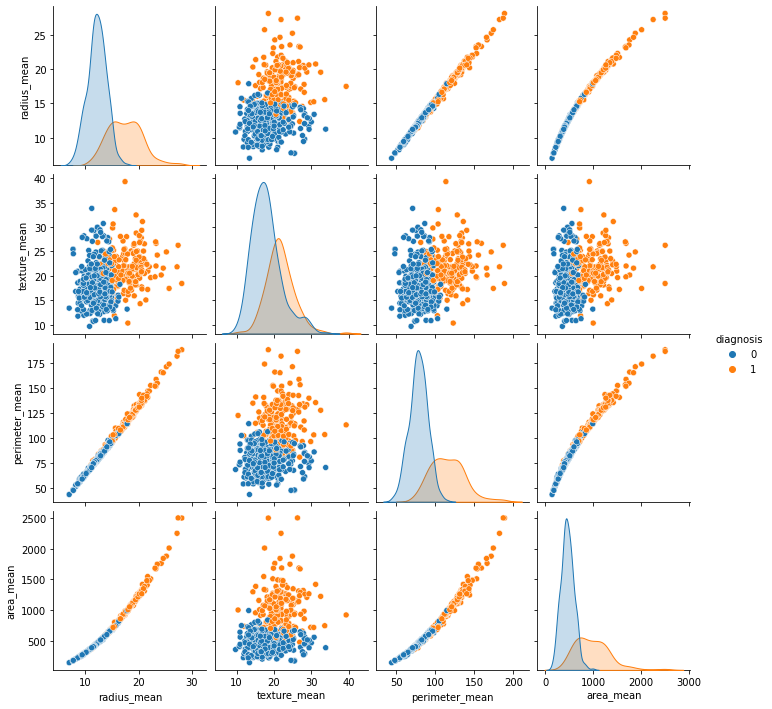

In [335]:
sns.pairplot(df.iloc[:,1:6],hue="diagnosis")

In [315]:
#correlation
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


<AxesSubplot:>

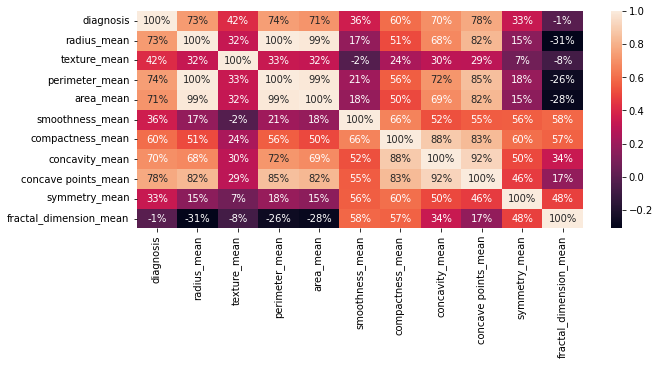

In [316]:
#vis the correlation
plt.figure(figsize=(10,4))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True,fmt=".0%")

In [317]:
df.loc[:,['diagnosis','radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']]

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concave points_mean
0,1,17.99,122.80,1001.0,0.27760,0.14710
1,1,20.57,132.90,1326.0,0.07864,0.07017
2,1,19.69,130.00,1203.0,0.15990,0.12790
3,1,11.42,77.58,386.1,0.28390,0.10520
4,1,20.29,135.10,1297.0,0.13280,0.10430
...,...,...,...,...,...,...
564,1,21.56,142.00,1479.0,0.11590,0.13890
565,1,20.13,131.20,1261.0,0.10340,0.09791
566,1,16.60,108.30,858.1,0.10230,0.05302
567,1,20.60,140.10,1265.0,0.27700,0.15200


In [318]:
#split into x and y sets
X=df.iloc[:,2:12].values
Y=df.iloc[:,1].values

In [319]:
#split 75% of the set into 75% training and 25% testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [320]:
#scale the data (0->1 || 0->100)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [354]:
#create a function for the models
def models(X_train,Y_train):
    #logic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)

    #decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(max_depth=5)
    tree.fit(X_train,Y_train)

    #random forest classifier
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators=2,max_depth=20,criterion='entropy',random_state=0)
    forest.fit(X_train,Y_train)

    #print the models accuracy on the training data
    print("[0]Logistic Regression Training Accuracy",log.score(X_train,Y_train))
    print("[1]Decision Tree Classifier Training Accuracy",tree.score(X_train,Y_train))
    print("[2]Random Forest Classifier Training Accuracy",forest.score(X_train,Y_train))

    return log,tree,forest

In [355]:
log,tree,forest=models(X_train,Y_train)

[0]Logistic Regression Training Accuracy 0.9389671361502347
[1]Decision Tree Classifier Training Accuracy 0.9906103286384976
[2]Random Forest Classifier Training Accuracy 0.9765258215962441


In [323]:
names,importances=[],[]
for name, importance in zip(df.columns, tree.feature_importances_):
    if name!="id" and name!="diagnosis":
        print(name,importance)
        names.append(name)
        importances.append(importance)



radius_mean 0.03260112170329911
texture_mean 0.04088262054728928
perimeter_mean 0.024133509653967575
area_mean 0.018774462536558453
smoothness_mean 0.004599203825406927
compactness_mean 0.7510506543931884
concavity_mean 0.017261946825228577
concave points_mean 0.005017313264080278


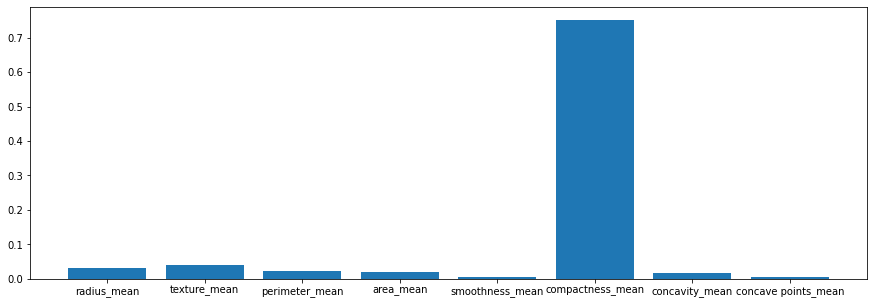

In [324]:
plt.figure(figsize=(15, 5))
plt.bar(names,importances)
plt.ylabel('')
plt.show()

In [325]:
#split into x and y sets
X2=df.loc[:,["radius_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean"]].values
Y2=df.iloc[:,1].values

In [326]:
df.loc[:,["diagnosis","radius_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean"]].head(50)

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean
0,1,17.990,122.80,1001.0,0.11840,0.27760,0.30010
1,1,20.570,132.90,1326.0,0.08474,0.07864,0.08690
2,1,19.690,130.00,1203.0,0.10960,0.15990,0.19740
3,1,11.420,77.58,386.1,0.14250,0.28390,0.24140
4,1,20.290,135.10,1297.0,0.10030,0.13280,0.19800
5,1,12.450,82.57,477.1,0.12780,0.17000,0.15780
6,1,18.250,119.60,1040.0,0.09463,0.10900,0.11270
7,1,13.710,90.20,577.9,0.11890,0.16450,0.09366
8,1,13.000,87.50,519.8,0.12730,0.19320,0.18590
9,1,12.460,83.97,475.9,0.11860,0.23960,0.22730


In [327]:
df.iloc[:,1].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [328]:
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2,Y2,test_size=0.25,random_state=0)

In [329]:
#scale the data (0->1 || 0->100)
sc=StandardScaler()
X2_train=sc.fit_transform(X2_train)
X2_test=sc.fit_transform(X2_test)

In [330]:
from sklearn.ensemble import RandomForestClassifier
forest2=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forest2.fit(X2_train,Y2_train)
print("[1]Decision Tree Classifier Training Accuracy",forest2.score(X2_train,Y2_train))


[1]Decision Tree Classifier Training Accuracy 0.9929577464788732


NameError: name 'tree2' is not defined

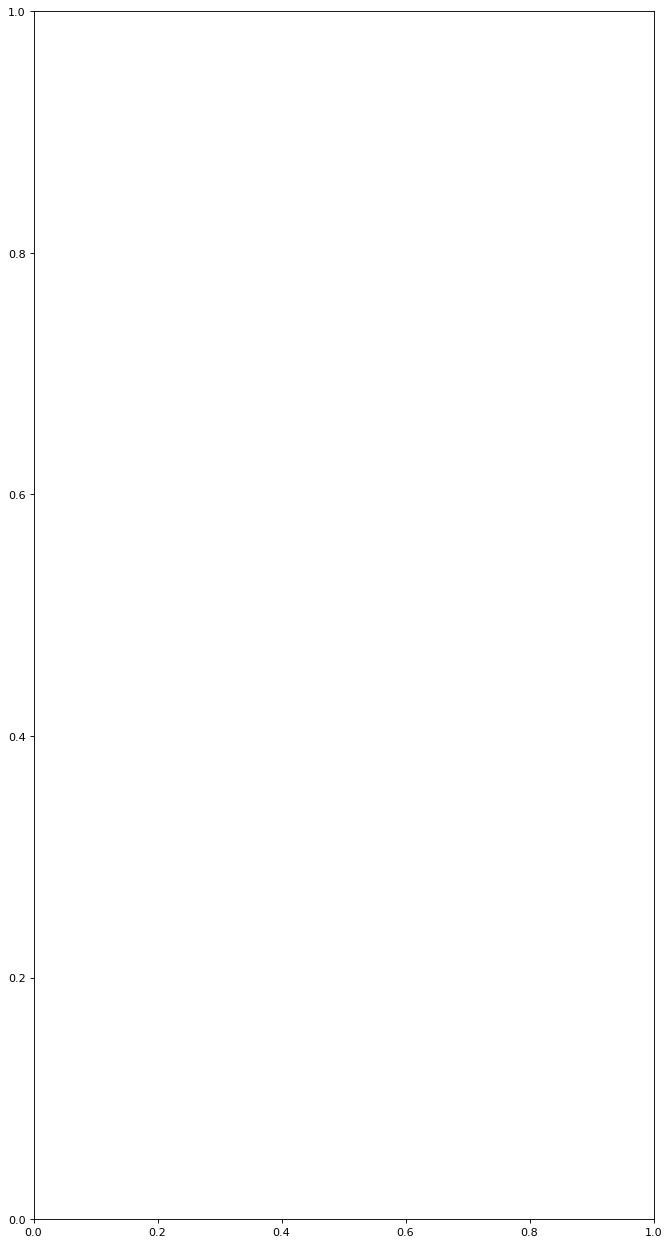

In [331]:
fig, axes = plt.subplots(figsize = (10,20), dpi=80)
tr.plot_tree(tree2, filled = True);

In [ ]:
pickle.dump(forest2, open('model.pkl','wb'))